# Introduction

Popeyes Louisiana Chicken (PP) & Chick-fil-A (CFA), founded in the late 60s and early 70s, are two famous American fast food restaurant chains with specialty in fried chicken. CFA has always been popular with its signature chicken sandwich. However, only recently did PP debut its new signature chicken sandwich. Surprisingly, in less than three weeks after Popeyes Louisiana Chicken (PP) introduced its new dish, it beat the anticipated demand and sold out across the nation. On top of that, the new PP chicken sandwich initiated a trend on social media #ChickenWars and attracted many people to debate who has a better chicken sandwich, Popeyes or Chick-fil-A? Unfortunately, Popeyes Louisiana Chicken did not announce when their sold-out sandwich would come back.

# Objective

The main objective of the present study is to examine the influence of Popeyes' Promotion at both Popeyes and Chick-fil-A's visit number and to analyze both chains' customers' demographic. 


### 1. Measure Foot Traffic at Popeyes and Chick-fil-A before & after the Promotion
First, I need to collect data from Foursquare Database. This query below will show the number of visit per day at Popeyes Lousiana Kitchen and Chick-fil-A between 2019-07-22 and 2019-09-15.


```sql
SELECT
  vc.chainname,
  cvnp.dt, 
  COUNT(cvnp.userid) AS total_visitpd
FROM 
  analytics.venuechains vc
  JOIN analytics.venueinfo vi ON vc.venueid = vi.venueid
  JOIN analytics.cvnp_optimized cvnp ON vi.venueid = cvnp.venueid
WHERE 
  vc.chainid IN ('561e8768498ea6bc69a4a287', '556e1846a7c82e6b72513d6b') -- Popeyes and Chick-fil-a chainid
  AND vi.cc = 'US'
  AND cvnp.dt BETWEEN '2019-07-22' AND '2019-09-15' 
GROUP BY
  vc.chainname,
  cvnp.dt
ORDER BY cvnp.dt
```

Now let's take a look at our data

In [1]:
import pandas as pd
df = pd.read_csv('cfa_pp.csv')
df.head()

,chainname,dt,total_visitpd
0,Popeyes Louisiana Kitchen,2019-07-22,16546
1,Chick-fil-A,2019-07-22,66994
2,Popeyes Louisiana Kitchen,2019-07-23,17408
3,Chick-fil-A,2019-07-23,73835
4,Popeyes Louisiana Kitchen,2019-07-24,17240


**Next Step**
* Create a graph to show number of visit per day from 2 chains from 2019-07-22 to 2019-09-15 -- 3 weeks before and 4 weeks after they released the new PP sandwiches.
* Compare to CFA, PP's total visit is much less. In order to show a clear comparison of visit from both chains, I'm going to create a new column called visit_share -- visit of the day/ total visit from that chain in the 7 weeks timeframe.


In [2]:
#Create a DataFrame which contains only Popeyes
dfp = df[df['chainname'] == 'Popeyes Louisiana Kitchen']
dfp.set_index('dt', inplace = True)

#Calculate percentage of visit every day over the total visit at Popeyes from 2019-07-22 to 2019-09-05
p_total = dfp.total_visitpd.sum()
visit_share_p = dfp['total_visitpd'] / p_total
dfp['visit_share'] = visit_share_p
dfp.head()

/Users/chauchu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chainname,total_visitpd,visit_share
dt,,,
2019-07-22,Popeyes Louisiana Kitchen,16546,0.014189
2019-07-23,Popeyes Louisiana Kitchen,17408,0.014928
2019-07-24,Popeyes Louisiana Kitchen,17240,0.014784
2019-07-25,Popeyes Louisiana Kitchen,17540,0.015041
2019-07-26,Popeyes Louisiana Kitchen,19097,0.016376


In [3]:
#Create a DataFrame which contains only Chick-fil-A
dfc = df[df['chainname'] == 'Chick-fil-A']
dfc.set_index('dt', inplace = True)

#Calculate percentage of visit every day over the total visit at Popeyes from 2019-07-22 to 2019-09-05 
c_total = dfc.total_visitpd.sum()
dfc['visit_share'] = dfc['total_visitpd'] / c_total
dfc.head()

/Users/chauchu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,chainname,total_visitpd,visit_share
dt,,,
2019-07-22,Chick-fil-A,66994,0.016626
2019-07-23,Chick-fil-A,73835,0.018324
2019-07-24,Chick-fil-A,75996,0.018860
2019-07-25,Chick-fil-A,80542,0.019988
2019-07-26,Chick-fil-A,87801,0.021790


In [4]:
#Identify the day the sandwiches was released and when it was sold out
#To show on the graph
release_day = dfp.loc['2019-08-12', 'visit_share']
soldout_day = dfp.loc['2019-08-27', 'visit_share']

#Create graph to show foot traffic at CFA and PP before and after the New Sandwiches Released
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go

fig = go.Figure()
fig = go.Figure()
fig.add_trace(go.Scatter(x = dfp.index, y = dfp['visit_share'],
                         name = 'Popeyes', line_color = 'orange', opacity = 0.8))
fig.add_trace(go.Scatter(x = dfc.index, y = dfc['visit_share'],
                         name = 'Chick-fil-a', line_color = 'red', opacity = 0.8))
fig.update_layout(
    showlegend = False,
    annotations = [
        go.layout.Annotation(
            x= '2019-08-12',
            y= release_day,
            xref = "x",
            yref = "y",
            text = "Release Day",
            showarrow = True,
            arrowhead = 7,
            ax=0,
            ay=-95
        ),
        go.layout.Annotation(
            x='2019-08-27',
            y=soldout_day,
            xref="x",
            yref="y",
            text="Sold Out Day",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)
#Add titles
fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title_text='Change in Visit over 8 week span')
fig.update_layout(
    title_text="Popeyes vs Chick-fil-a Foot Traffic before and after the New Sandwiches Released",showlegend=True)
iplot(fig)


**Analysis**

* Before the new Popeyes Sandwiches was released, both CFA and PP have a steady number of visits. In both chains, Fridays and Saturdays are their busiest days. As for CFA, the number of visits suddenly go down on Sundays because the chain closed on those days.
* After a week of promotion, PP visits increased. Although the volume of visits was still higher than before the promotion, the number of visits decreased before they officially sold out the sandwiches.  There are a lot of reasons which could possibly lead to this -- a lot of their stores already sold out, or the line of waiting was too long.
* Popeyes’ promotion also helped CFA attract more customers. When PP sandwiches became a trend after a week of promotion, the number of visits at CFA also increased. And right after PP sold out the sandwiches, the volume of visits at CFA increased more. One of the reasons could be because of social media, where people would compare both chains’ sandwiches.
* In Foursquare Database, CFA only have 200 more stores than PP. However, looking at the graph, we can tell that CFA is still American's favorite fast food restaurant chain. The volume of visits at CFA are extremely larger than PP's in general.


### 2. Age & Gender Distribution of Customers at Popeyes & Chick-fil-A

### a. In the last three years
Foursquare's database includes a table that show the user id with different probabilities of ones' age and gender. Since the table is very large and expensive to run query on, I'm going to create a temporary table to rank the probabilities of their age and gender. 

```sql
CREATE OR REPLACE TEMPORARY VIEW user_prob AS 

SELECT 
ui.userid, 
ui.gender,
ui.age,
ui.probability,
RANK() OVER (PARTITION BY userid ORDER BY probability DESC) AS demo_rank

FROM analytics.userinfo ui
```

Next, I'm going to create a table with total number of visit at CFA and PP group by gender and age in the last three years.

```sql
SELECT
cvnp.dt,
up.gender,
up.age,
vc.chainname,
COUNT(cvnp.userid) AS number_visit

FROM 
user_prob up 
JOIN  analytics.cvnp_optimized cvnp ON up.userid = cvnp.userid
JOIN analytics.venueinfo vi ON cvnp.venueid = vi.venueid
JOIN analytics.venuechains vc ON vc.venueid = vi.venueid

WHERE
vc.chainid IN ('561e8768498ea6bc69a4a287', '556e1846a7c82e6b72513d6b') -- Popeyes and Chick-fil-a chainid
  AND vi.cc = 'US'
  AND cvnp.dt BETWEEN '2015-07-01' AND '2019-09-15' 
  AND up.demo_rank = '1' -- highest probablity of user info
  
GROUP BY cvnp.dt, up.gender, up.age, vc.chainname

ORDER BY cvnp.dt
```

Now, let's take a look at our data

In [5]:
df1 = pd.read_csv('pp_cfa1.csv')
df1.head()

,dt,gender,age,chainname,number_visit
0,2015-07-01,male,55_64,Chick-fil-A,173
1,2015-07-01,female,65_plus,Popeyes Louisiana Kitchen,16
2,2015-07-01,male,45_54,Chick-fil-A,541
3,2015-07-01,male,45_54,Popeyes Louisiana Kitchen,135
4,2015-07-01,male,55_64,Popeyes Louisiana Kitchen,46


In [6]:
#Create a dataframe group by chainname, age & gender with total number of visits.
df2 = df1.groupby(['chainname','gender','age'], as_index = False)['number_visit'].sum()
df2

,chainname,gender,age,number_visit
0,Chick-fil-A,female,18_24,1832416
1,Chick-fil-A,female,25_34,6015081
2,Chick-fil-A,female,35_44,7496771
3,Chick-fil-A,female,45_54,2869178
4,Chick-fil-A,female,55_64,986351
5,Chick-fil-A,female,65_plus,423463
6,Chick-fil-A,female,Under_18,244295
7,Chick-fil-A,male,18_24,1289614
8,Chick-fil-A,male,25_34,5692013
9,Chick-fil-A,male,35_44,7315488


Since PP volume of visits are much less than CFA's, in order to have a better visualization, we need to normalize data of number of visits

In [7]:
from sklearn import preprocessing

x = df2[['number_visit']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
visit_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
visit_normalized = pd.DataFrame(visit_scaled, columns = ['visit_normalized'])

#Add the visit_normalized dataframe as a new column at our original dataframe
df3 = df2.join(visit_normalized)
df3

,chainname,gender,age,number_visit,visit_normalized
0,Chick-fil-A,female,18_24,1832416,0.243434
1,Chick-fil-A,female,25_34,6015081,0.802096
2,Chick-fil-A,female,35_44,7496771,1.000000
3,Chick-fil-A,female,45_54,2869178,0.381910
4,Chick-fil-A,female,55_64,986351,0.130429
5,Chick-fil-A,female,65_plus,423463,0.055246
6,Chick-fil-A,female,Under_18,244295,0.031315
7,Chick-fil-A,male,18_24,1289614,0.170934
8,Chick-fil-A,male,25_34,5692013,0.758946
9,Chick-fil-A,male,35_44,7315488,0.975787


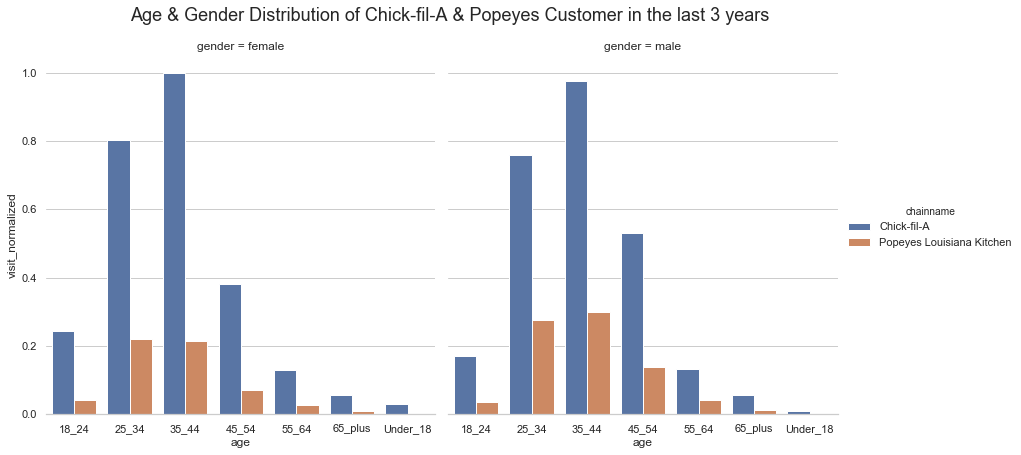

In [8]:
#Using Seaborn Catplot to create a chart to compare the demographic of the two chains
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

g = sns.catplot(x="age", y="visit_normalized", col="gender", hue = 'chainname',
               data= df3, kind="bar", aspect=1, height = 6)
g.fig.suptitle('Age & Gender Distribution of Chick-fil-A & Popeyes Customer in the last 3 years', x = 0.45, y = 1.05, 
               fontsize = 18)
g.despine(left=True)


**Analysis**

* Both chains: 25-34, 35-44 have the highest volume of visits.
* CFA: Female in 25-34, 34-45 visits > Male. While Female 45-54 visits < Male
* PP: Female in 25-34 visits < Male, while female 45-54 > Male


### b. Before and After the Promotion
Next, I want to compare the foot traffic from two chains by different age group before and after the promotion. First, I will create a dataframe that only includes date from 2019-07-22 to 2019-09-05 in order to create a multi-line grapgh of visit from different age groups.

In [9]:
#Convert string to datetime in order to select date range from 2019-07-22 to 2019-09-05
df1['dt'] = pd.to_datetime(df1['dt'])  
mask = (df1['dt'] >'2019-07-21') & (df1['dt'] <= '2019-09-05')
dfv = df1.loc[mask]
dfv.index = range(len(dfv))

#Create a Dataframe group by age, date & chain name with total number of visits
dfv = dfv.groupby(['dt','age','chainname'], as_index = False)['number_visit'].sum()
dfv.head()


,dt,age,chainname,number_visit
0,2019-07-22,18_24,Chick-fil-A,6096
1,2019-07-22,18_24,Popeyes Louisiana Kitchen,913
2,2019-07-22,25_34,Chick-fil-A,17075
3,2019-07-22,25_34,Popeyes Louisiana Kitchen,4876
4,2019-07-22,35_44,Chick-fil-A,21420


In [10]:
#Scaling data in order to create a better visualization

y = dfv[['number_visit']].values.astype(float)

# Create an object to transform the data to fit minmax processor
y_scaled = min_max_scaler.fit_transform(y)

# Run the normalizer on the dataframe
scaled_visit = pd.DataFrame(y_scaled, columns = ['visit_scaled'])

#Add the new dataframe scaled_visit as a new column in the original dataframe
dfv = dfv.join(scaled_visit)


In [11]:
def getdf(x):
    s = {}
    t = {}
    for i in x['age'].unique():
        s[i] = x[(x['chainname'] == 'Chick-fil-A') & (x['age'] == i)] 
        t[i] = x[(x['chainname'] == 'Popeyes Louisiana Kitchen') & (x['age'] == i)]
    return s,t
cfa, pp = getdf(dfv)


In [12]:
#Showing two graphs on the same row
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, subplot_titles = ('Chick-fil-A', 'Popeyes'))

fig.add_trace(go.Scatter(x = cfa['Under_18']['dt'], y = cfa['Under_18']['visit_scaled'],
                         name = 'Under 18', line_color = 'orange', opacity = 0.8),1,1)
fig.add_trace(go.Scatter(x = cfa['18_24']['dt'], y = cfa['18_24']['visit_scaled'],
                         name = '18_24', line_color = 'green', opacity = 0.8),1,1)
fig.add_trace(go.Scatter(x = cfa['25_34']['dt'], y = cfa['25_34']['visit_scaled'],
                         name = '25_34', line_color = 'blue', opacity = 0.8),1,1)
fig.add_trace(go.Scatter(x = cfa['35_44']['dt'], y = cfa['35_44']['visit_scaled'],
                         name = '35_44', line_color = 'red', opacity = 0.8),1,1)
fig.add_trace(go.Scatter(x = cfa['45_54']['dt'], y = cfa['45_54']['visit_scaled'],
                         name = '45_54', line_color = 'brown', opacity = 0.8),1,1)
fig.add_trace(go.Scatter(x = cfa['55_64']['dt'], y = cfa['55_64']['visit_scaled'],
                         name = '55_64', line_color = 'pink', opacity = 0.8),1,1)
fig.add_trace(go.Scatter(x = cfa['65_plus']['dt'], y = cfa['65_plus']['visit_scaled'],
                         name = '65_plus', line_color = 'yellow', opacity = 0.8),1,1)

fig.add_trace(go.Scatter(x = pp['Under_18']['dt'], y = pp['Under_18']['visit_scaled'],
                         name = 'Under 18', line_color = 'orange', opacity = 0.8, showlegend = False),1,2)
fig.add_trace(go.Scatter(x = pp['18_24']['dt'], y = pp['18_24']['visit_scaled'],
                         name = '18_24', line_color = 'green', opacity = 0.8, showlegend = False),1,2)
fig.add_trace(go.Scatter(x = pp['25_34']['dt'], y = pp['25_34']['visit_scaled'],
                         name = '25_34', line_color = 'blue', opacity = 0.8, showlegend = False),1,2)
fig.add_trace(go.Scatter(x = pp['35_44']['dt'], y = pp['35_44']['visit_scaled'],
                         name = '35_44', line_color = 'red', opacity = 0.8, showlegend = False),1,2)
fig.add_trace(go.Scatter(x = pp['45_54']['dt'], y = pp['45_54']['visit_scaled'],
                         name = '45_54', line_color = 'brown', opacity = 0.8, showlegend = False),1,2)
fig.add_trace(go.Scatter(x = pp['55_64']['dt'], y = pp['55_64']['visit_scaled'],
                         name = '55_64', line_color = 'pink', opacity = 0.8, showlegend = False),1,2)
fig.add_trace(go.Scatter(x = pp['65_plus']['dt'], y = pp['65_plus']['visit_scaled'],
                         name = '65_plus', line_color = 'yellow', opacity = 0.8, showlegend = False),1,2)

fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title_text='Change in Visit',  tickmode = 'array',
        tickvals = [0, 0.2, 0.4, 0.6, 0.8])
fig.update_layout(
    title_text="Foot Traffic at Popeyes vs Chick-fil-a by Age Groups before and after the Promotion ",
    showlegend = True)

iplot(fig)

In [13]:
rl = dfv[(dfv['dt'] == '2019-08-12') & (dfv['age'] == '25_34') & (dfv['chainname'] == 'Chick-fil-A')]
rl

,dt,age,chainname,number_visit,visit_scaled
296,2019-08-12,25_34,Chick-fil-A,17494,0.54766


In [14]:
sd = dfv[(dfv['dt'] == '2019-08-27')& (dfv['age'] == '25_34') & (dfv['chainname'] == 'Chick-fil-A')]
sd

,dt,age,chainname,number_visit,visit_scaled
506,2019-08-27,25_34,Chick-fil-A,21358,0.668937


In [15]:
#Create release date and sold out date values in order to add annotation on the graph
release_date = dfv.at[297, 'visit_scaled']
soldout_date = dfv.at[507, 'visit_scaled']

In [16]:
#Create graph to show visits from different age group from PP only

fig = go.Figure()
fig.add_trace(go.Scatter(x = pp['Under_18']['dt'], y = pp['Under_18']['visit_scaled'],
                         name = 'Under 18', line_color = 'orange', opacity = 0.8))
fig.add_trace(go.Scatter(x = pp['18_24']['dt'], y = pp['18_24']['visit_scaled'],
                         name = '18_24', line_color = 'green', opacity = 0.8))
fig.add_trace(go.Scatter(x = pp['25_34']['dt'], y = pp['25_34']['visit_scaled'],
                         name = '25_34', line_color = 'blue', opacity = 0.8))
fig.add_trace(go.Scatter(x = pp['35_44']['dt'], y = pp['35_44']['visit_scaled'],
                         name = '35_44', line_color = 'red', opacity = 0.8))
fig.add_trace(go.Scatter(x = pp['45_54']['dt'], y = pp['45_54']['visit_scaled'],
                         name = '45_54', line_color = 'brown', opacity = 0.8))
fig.add_trace(go.Scatter(x = pp['55_64']['dt'], y = pp['55_64']['visit_scaled'],
                         name = '55_64', line_color = 'pink', opacity = 0.8))
fig.add_trace(go.Scatter(x = pp['65_plus']['dt'], y = pp['65_plus']['visit_scaled'],
                         name = '65_plus', line_color = 'yellow', opacity = 0.8))


fig.update_layout(
    showlegend = False,
    annotations = [
        go.layout.Annotation(
            x= '2019-08-12',
            y= release_date,
            xref = "x",
            yref = "y",
            text = "Release Day",
            showarrow = True,
            arrowhead = 7,
            ax=0,
            ay=-40
        ),
        go.layout.Annotation(
            x='2019-08-27',
            y=soldout_date,
            xref="x",
            yref="y",
            text="Sold Out Day",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-60
        )
    ]
)

fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title_text = 'Change in Visit')
fig.update_layout(title_text = 'Foot Traffic at Popeyes by Different Age Groups', showlegend = True )
iplot(fig)

**Analysis**
* PP and CFA have a very similar demographic of customers. People from 25-34 & 35-44 are the most regular customers. 
* PP: the promotion attracts all groups of age, especially for age group 18-24, there was a sudden rise in visits. It can be due to social media, and this age group tends to follow trends most.
* CFA: Surprisingly, age group 35-44 is influenced most by the promotion.
* For both chains, Foursquare does not have enough data for age group under 18 and 65 plus (less than 2%). Therefore, the volume of visits from these groups are very low, and there's no way to capture the changes of visit from these age groups.

### 4. Does Popeyes' promotion bring CFA's loyal customers to the chain?

For the sake of this analysis, I define CFA's loyal customers as people who only went to CFA in 2019 before PP's promotion started.

First, I'm going to create a temporary table to collect all the user ids of whom only went to CFA before Popeyes' promotion started. 
```sql
CREATE OR REPLACE TEMPORARY VIEW t1 AS 

SELECT
userid

FROM analytics.cvnp_optimized cvnp
JOIN analytics.venuechains vc ON cvnp.venueid = vc.venueid

WHERE chainid = '556e1846a7c82e6b72513d6b' -- CFA's chainid
    AND chainid != '561e8768498ea6bc69a4a287' -- PP's chainid
    AND dt BETWEEN '2019-01-01' AND '2019-08-11'
```

Next, I'm going to write queries to see how many of those who ONLY went to CFA before, visited both chains, either of them, or none during and after the promotion.

**During the Promotion**
```sql
-- Count people who only went to CFA before, now go to both during promotion
SELECT
 COUNT (DISTINCT t1.userid)
FROM t1 
JOIN analytics.cvnp_optimized cvnp ON t1.userid = cvnp.userid
JOIN analytics.venuechains vc ON cvnp.venueid = vc.venueid

WHERE chainid IN ('561e8768498ea6bc69a4a287', '556e1846a7c82e6b72513d6b')
AND dt BETWEEN '2019-08-12' AND '2019-08-27'
```
Result: 600196

```sql
-- Count people who only went to CFA before,visit cfa only during promotion
SELECT
 COUNT (DISTINCT t1.userid)
FROM t1 
JOIN analytics.cvnp_optimized cvnp ON t1.userid = cvnp.userid
JOIN analytics.venuechains vc ON cvnp.venueid = vc.venueid

WHERE chainid = '556e1846a7c82e6b72513d6b'
AND dt BETWEEN '2019-08-12' AND '2019-08-27'
```
Result: 521009

```sql
-- Count people who only went to CFA before,visit popeyes only during promotion
SELECT
 COUNT (DISTINCT t1.userid)
FROM t1 
JOIN analytics.cvnp_optimized cvnp ON t1.userid = cvnp.userid
JOIN analytics.venuechains vc ON cvnp.venueid = vc.venueid

WHERE chainid = '561e8768498ea6bc69a4a287'
AND dt BETWEEN '2019-08-12' AND '2019-08-27'
```
Result: 121732

```sql
-- Count people who go to cfa before, now go to none during the promotion
SELECT
 COUNT (DISTINCT t1.userid)
FROM t1 
JOIN analytics.cvnp_optimized cvnp ON t1.userid = cvnp.userid
JOIN analytics.venuechains vc ON cvnp.venueid = vc.venueid

WHERE chainid NOT IN ('561e8768498ea6bc69a4a287', '556e1846a7c82e6b72513d6b')
AND dt BETWEEN '2019-08-12' AND '2019-08-27'
```
Result: 2206292 

**After the Promotion**
```sql
-- Count people who only went to CFA before, now go to both after promotion
SELECT
 COUNT (DISTINCT t1.userid)
FROM t1 
JOIN analytics.cvnp_optimized cvnp ON t1.userid = cvnp.userid
JOIN analytics.venuechains vc ON cvnp.venueid = vc.venueid

WHERE chainid IN ('561e8768498ea6bc69a4a287', '556e1846a7c82e6b72513d6b')
AND dt BETWEEN '2019-08-28' AND '2019-09-15'
```
Result: 678984

```sql
-- Count people who only went to CFA before,visit CFA only after promotion
SELECT
 COUNT (DISTINCT t1.userid)
FROM t1 
JOIN analytics.cvnp_optimized cvnp ON t1.userid = cvnp.userid
JOIN analytics.venuechains vc ON cvnp.venueid = vc.venueid

WHERE chainid = '556e1846a7c82e6b72513d6b'
AND dt BETWEEN '2019-08-28' AND '2019-09-15'
```
Result: 601817

```sql
-- Count people who only went to CFA before, visit PP only after promotion
SELECT
 COUNT (DISTINCT t1.userid)
FROM t1 
JOIN analytics.cvnp_optimized cvnp ON t1.userid = cvnp.userid
JOIN analytics.venuechains vc ON cvnp.venueid = vc.venueid

WHERE chainid = '561e8768498ea6bc69a4a287'
AND dt BETWEEN '2019-08-28' AND '2019-09-15'
```
Result: 122332

```sql
-- Count people who only went to cfa before, now go to none after promotion
SELECT
 COUNT (DISTINCT t1.userid)
FROM t1 
JOIN analytics.cvnp_optimized cvnp ON t1.userid = cvnp.userid
JOIN analytics.venuechains vc ON cvnp.venueid = vc.venueid

WHERE chainid NOT IN ('561e8768498ea6bc69a4a287', '556e1846a7c82e6b72513d6b')
AND dt BETWEEN '2019-08-28' AND '2019-09-15'
```
Result: 2290142

**Next step**

Create two donut-like pie charts to compare if Popeyes's new sandwiches attract loyal Chick-fil-A customers' during and after it was released.

In [17]:
labels = ['Both Chick-fil-a & Popeyes','Chick-fil-a Only','Popeyes Only','None']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[600196, 521009, 121732, 2206292], name="During Promotion"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[678984,601817,122332,2290142], name="After Promotion"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Where Do Loyal Chick-fil-A Customers Go during & after the Promotion? ",
# Add annotations in the center of the donut pies.
    annotations=[dict(text='During', x=0.18, y=0.5, font_size=19, showarrow=False),
                 dict(text='After', x=0.82, y=0.5, font_size=19, showarrow=False)])
iplot(fig)

**Analysis**
* The Popeye’s promotion successfully attracts a small number of loyal CFA customers to visit the chain. However, because the sandwiches sold out too fast, and the chain isn’t sure about when it’s coming back, people started coming back to CFA